#### Load Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import folium

In [2]:
#Create a DataFrame
tanz = pd.read_csv('training.csv')

In [3]:
tanz.head(1)

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0


In [4]:
#Rename columns accordingly

tanz = tanz.rename(columns ={'Q1':'Age','Q2':'Gender','Q3':'Marital_status','Q4':'Level_of_education',
                               'Q5':'Land_ownership','Q6':'Other_land_ownership','Q7':'Owning_a_mobile_phone',
                               'Q9':'Employer','Q10':'Product_sold','Q11':'Service_provided','Q13':'sending_money_out_date'
                               ,'Q15':'recent_date_money_recieved','Q14':'cash_recieved_non_domestically','Q16':'purchasing_frequency_for_using_mobile_money'
                               ,'Q17':'bill_frequency_for_using_mobile_money','Q18':'Literacy_in_Kiswhahili','Q19':'English_literacy',
                                             'Q8_1':'Salaries',"Q8_2":'Trading','Q8_3':'Service','Q8_4':'Casual_work','Q8_5':'Rental','Q8_6':'Interest',
                                             'Q8_7':'Pension','Q8_8':'Social_welfare','Q8_9':'Dependent','Q8_10':'Dont_get_money','Q8_11':'Other'
                              })

In [5]:
tanz.head(1)

,ID,Age,Gender,Marital_status,Level_of_education,Land_ownership,Other_land_ownership,Owning_a_mobile_phone,Salaries,Trading,...,bill_frequency_for_using_mobile_money,Literacy_in_Kiswhahili,English_literacy,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0


In [6]:
date = {-1:'N/A',1:'Yesterday/Today',2:'Past 7 days',3:'Past 30 days',4:'Past 90 days',5:'More than 90 days but less than 6 months',6:'6 months or longer'}
tanz['sending_money_out_date']=tanz.sending_money_out_date.map(date)

In [7]:
received = {-1:'N/A',1:'Yesterday/Today',2:'Past 7 days',3:'Past 30 days',4:'Past 90 days',5:'More than 90 days but less than 6 months',6:'6 months or longer'}
tanz['recent_date_money_recieved']=tanz.recent_date_money_recieved.map(received)

#### Examining Dataset for any missing values

In [8]:
tanz.isnull().sum()

ID                                             0
Age                                            0
Gender                                         0
Marital_status                                 0
Level_of_education                             0
Land_ownership                                 0
Other_land_ownership                           0
Owning_a_mobile_phone                          0
Salaries                                       0
Trading                                        0
Service                                        0
Casual_work                                    0
Rental                                         0
Interest                                       0
Pension                                        0
Social_welfare                                 0
Dependent                                      0
Dont_get_money                                 0
Other                                          0
Employer                                       0
Product_sold        

There are no missing values in the dataset. Everything is accounted for.

#### Financial services accessed.

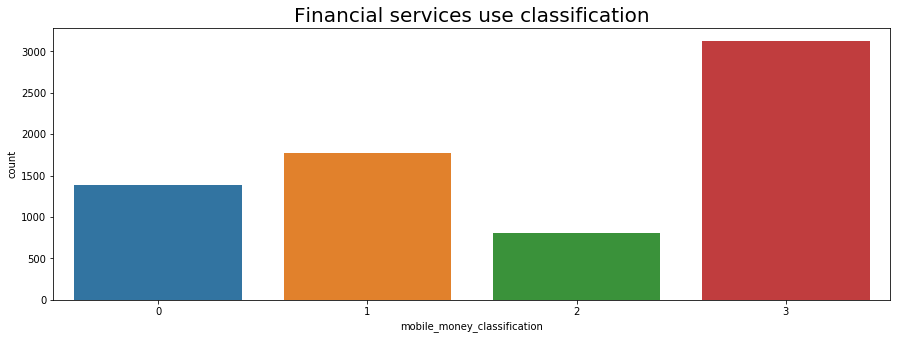

In [9]:
plt.figure(figsize=(15,5))
fontdict={'fontsize':20}
sns.countplot(x='mobile_money_classification',data=tanz)
plt.title('Financial services use classification',fontdict=fontdict)
plt.show()


The chart above shows that people use mobile and atleast one other financial service.

### Financial services classification and Age

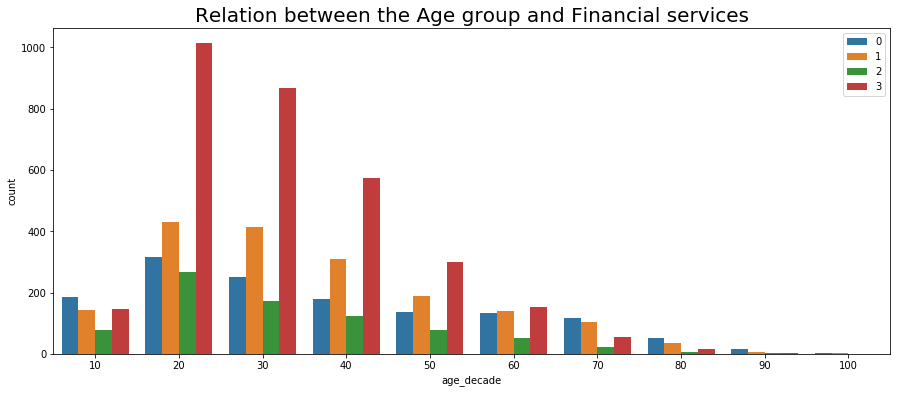

In [10]:
tanz['age_decade']=tanz.Age.apply(lambda x : int(x/10)*10)
plt.figure(figsize=(15,6))
fontdict={'fontsize':20}
sns.countplot(x='age_decade',hue='mobile_money_classification',data = tanz)
plt.legend(loc='upper right')
plt.title('Relation between the Age group and Financial services',fontdict=fontdict)
plt.show()

People within the 20 & 30 year old age group mostly use mobile money and another financial service.

### Financial services classification and Gender

In [11]:
gender={1:'Male',2:'Female'}
tanz['Gender']=tanz.Gender.map(gender)

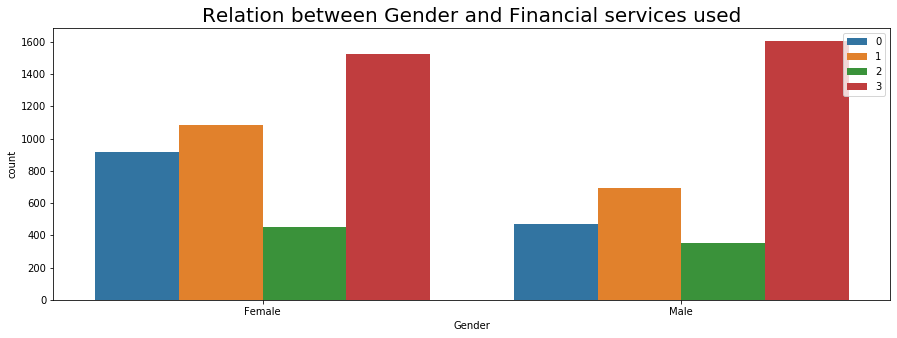

In [12]:
plt.figure(figsize=(15,5))
fontdict={'fontsize':20}
sns.countplot(x='Gender',hue='mobile_money_classification',data=tanz)
plt.legend(loc='upper right')
plt.title('Relation between Gender and Financial services used',fontdict=fontdict)
plt.show()

Females use more mobile money than Males.

### Financial services classification and Marital Status

In [13]:
status = {1:'Married',2:'Divorced',3:'Widowed',4:'Single'}
tanz['Marital_status']=tanz.Marital_status.map(status)

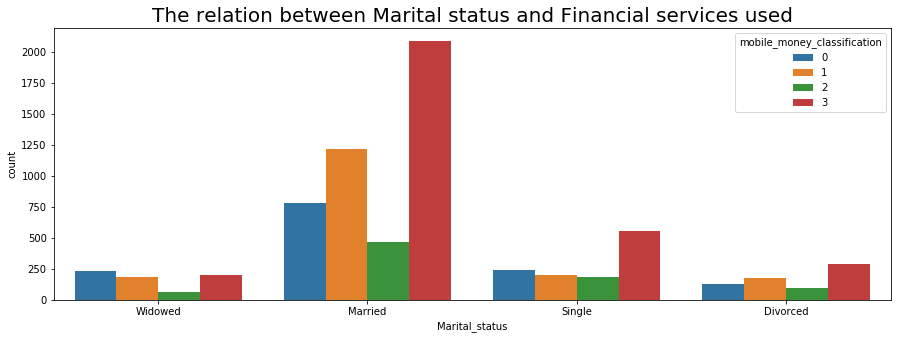

In [14]:
plt.figure(figsize=(15,5))
fontdict={'fontsize':20}
sns.countplot(x='Marital_status',hue='mobile_money_classification',data=tanz)
plt.title('The relation between Marital status and Financial services used',fontdict=fontdict)
plt.show()

Married people have the highest occurence of using mobile money and at leats one other service. this could be attributed to the increased responsibility of joint living and family obligations.

### Financial services classification and Land ownership

In [15]:
land = {1:'Yes',2:'No'}
tanz['Other_land_ownership']=tanz.Other_land_ownership.map(land)

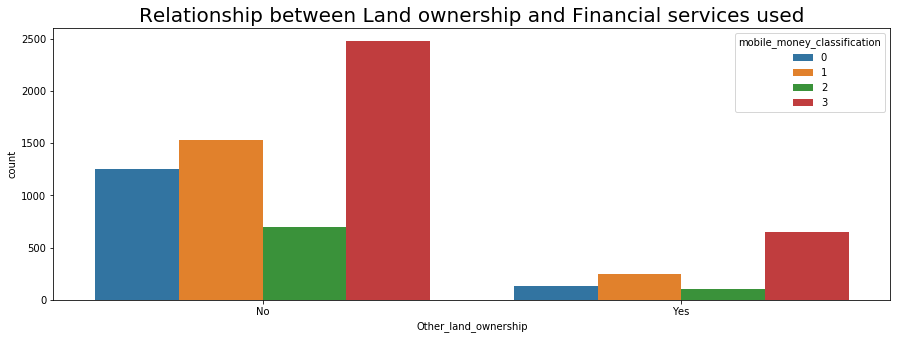

In [16]:
plt.figure(figsize=(15,5))
fontdict={'fontsize':20}
sns.countplot(x='Other_land_ownership',hue='mobile_money_classification',data=tanz)
plt.title('Relationship between Land ownership and Financial services used',fontdict=fontdict)
plt.show()

###  Financial services classification and the Types of income

In [17]:
data_frame = tanz[['mobile_money_classification','Latitude','Longitude','sending_money_out_date','Gender','recent_date_money_recieved','Salaries','Trading','Service','Casual_work','Rental','Interest',
                                             'Pension','Social_welfare','Dependent','Dont_get_money','Other']].copy()
data_frame_melt = data_frame.melt(id_vars=['mobile_money_classification','Latitude','Longitude','sending_money_out_date','Gender','recent_date_money_recieved'])
counts=data_frame_melt[data_frame_melt.value==1]

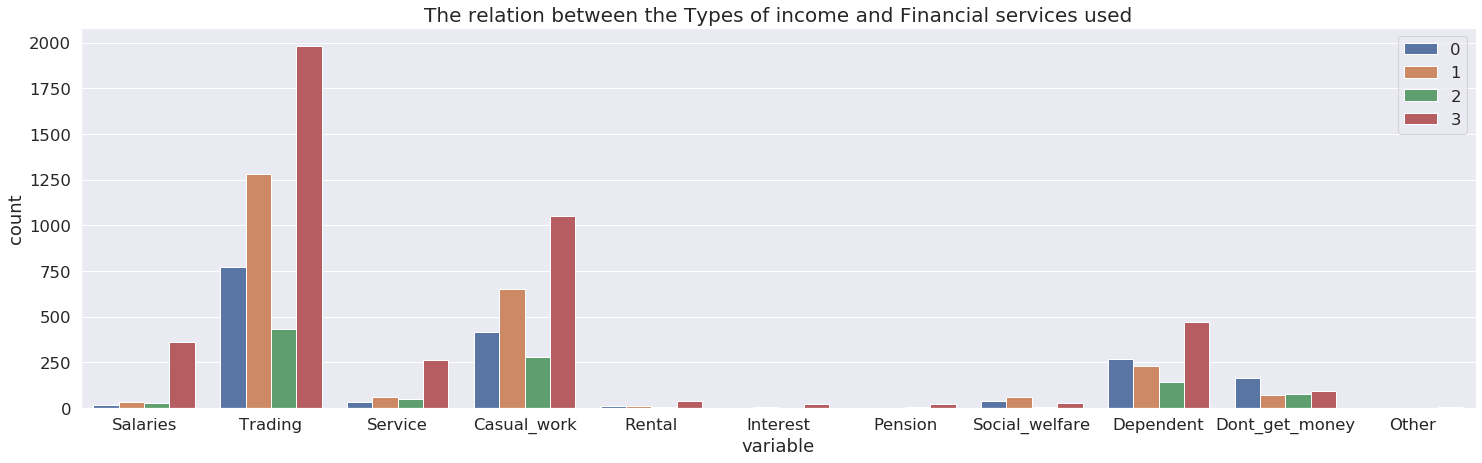

In [18]:
plt.figure(figsize=(25,7))
fontdict={'fontsize':20}
sns.set(font_scale=1.5)
sns.countplot(counts.variable,hue= 'mobile_money_classification',data =counts)
plt.legend(loc='upper right')
plt.title('The relation between the Types of income and Financial services used',fontdict=fontdict)
plt.show()

## How often are mobile money services used?

### How often  Mobile money services are used  and Age

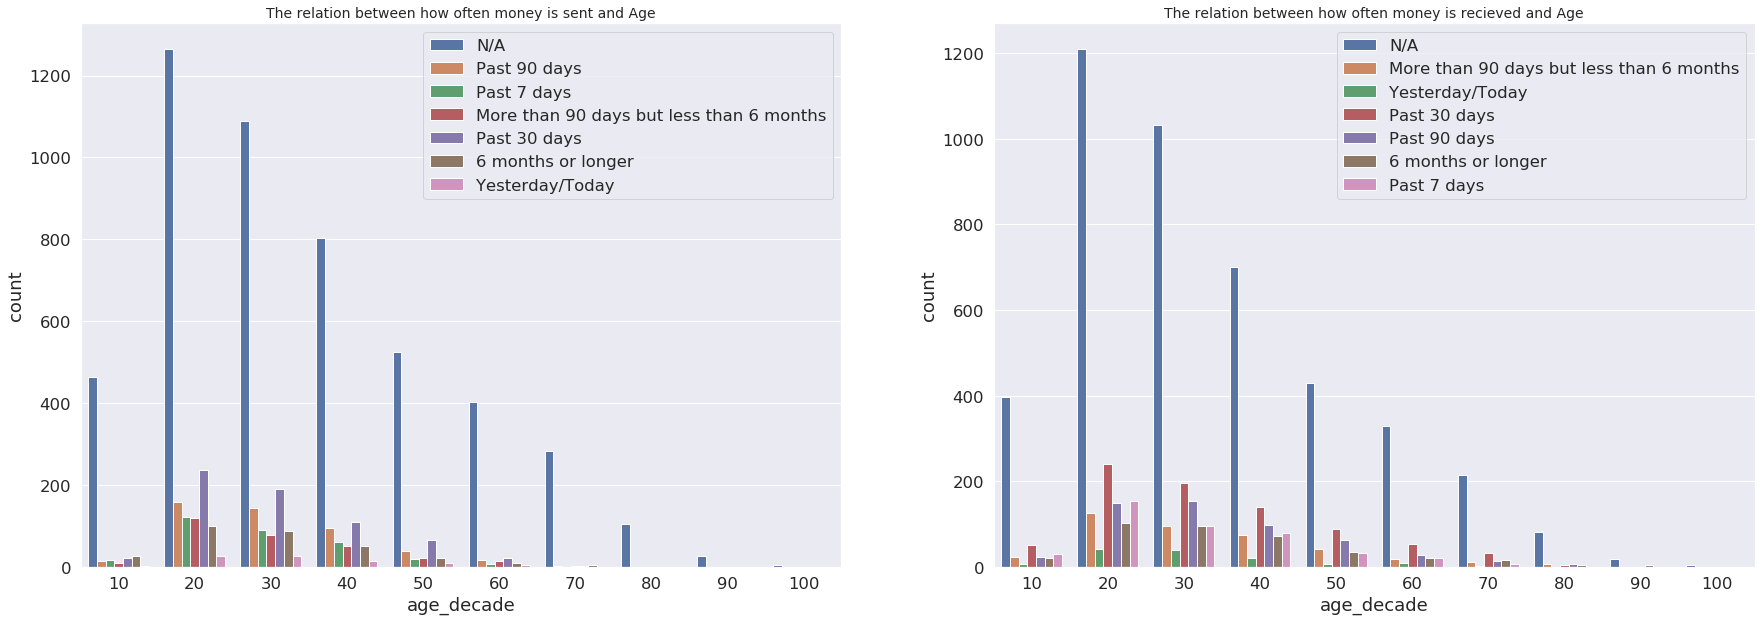

In [19]:
f, axes = plt.subplots(1, 2,figsize=(30, 10))
fontdict={'fontsize':14}
sns.set(font_scale=1.5)
sns.countplot(x='age_decade',hue='sending_money_out_date',data=tanz, ax= axes[0])
sns.countplot(x='age_decade',hue='recent_date_money_recieved',data=tanz,ax =axes[1])
axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[0].set_title('The relation between how often money is sent and Age',fontdict=fontdict)
axes[1].set_title('The relation between how often money is recieved and Age',fontdict=fontdict)
plt.show()

*Most people who sent and recieved money are in the age group of 20s in the past 30 days.*

###  How often  Mobile money services are used  and Gender

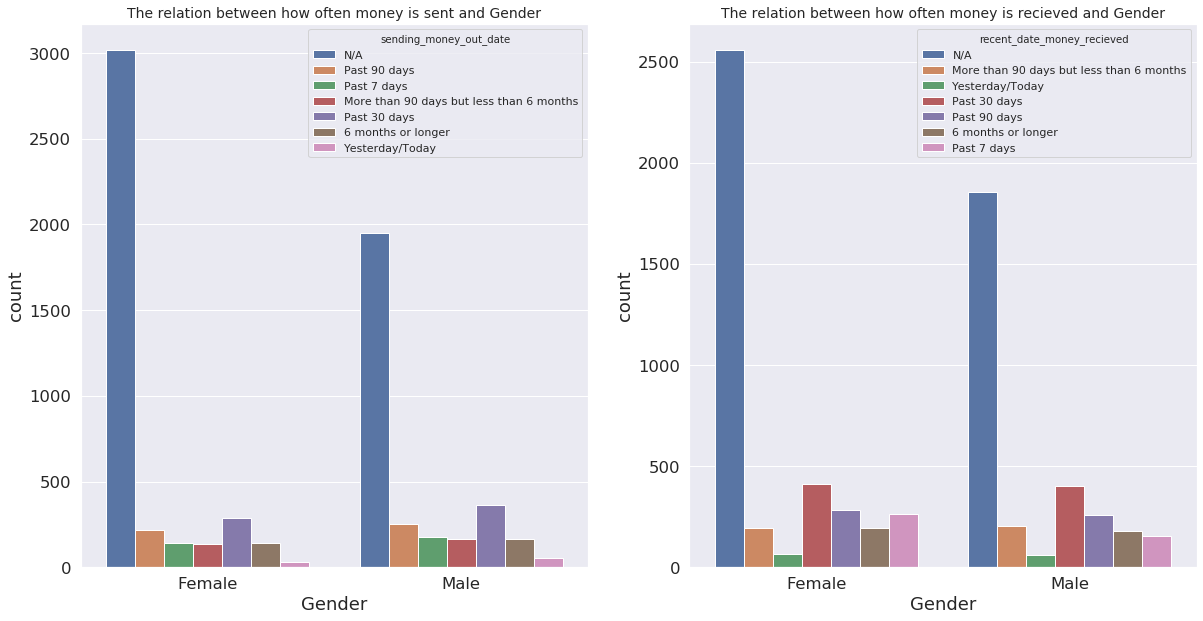

In [20]:
f, axes = plt.subplots(1, 2,figsize=(20, 10))
fontdict={'fontsize':14}
sns.set(font_scale=1)
sns.countplot(x='Gender',hue='sending_money_out_date',data=tanz, ax = axes[0])
sns.countplot(x='Gender',hue='recent_date_money_recieved',data=tanz,ax = axes[1])
axes[0].set_title('The relation between how often money is sent and Gender',fontdict=fontdict)
axes[1].set_title('The relation between how often money is recieved and Gender',fontdict=fontdict)
plt.show()

*Most people who sent money are males in the past 30 days.*
*Both males and females mostly recieved money in the last 30 days.*

###   How often  Mobile money services are used and Maritul status


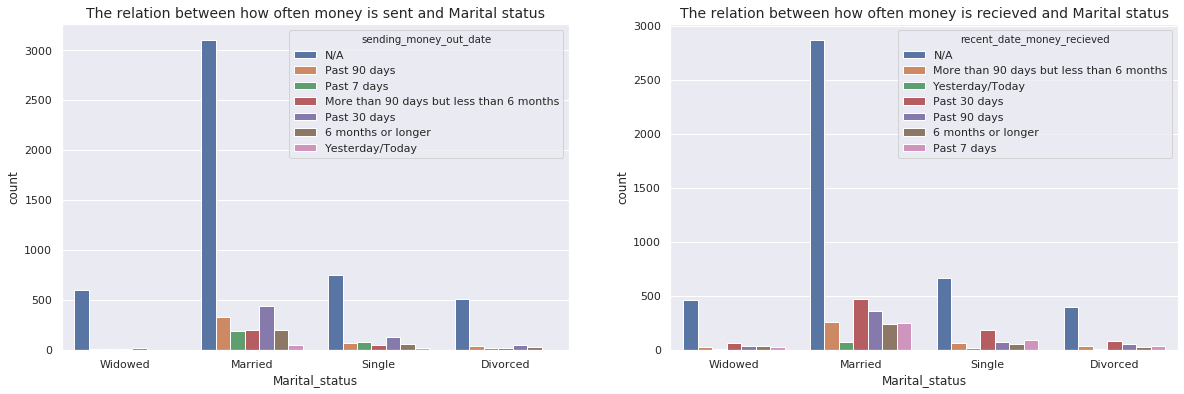

In [21]:
f, axes = plt.subplots(1, 2,figsize=(20, 6))
fontdict={'fontsize':14}
sns.set(font_scale=1)
sns.countplot(x='Marital_status',hue='sending_money_out_date',data=tanz,ax=axes[0])
sns.countplot(x='Marital_status',hue='recent_date_money_recieved',data=tanz,ax=axes[1])
axes[0].set_title('The relation between how often money is sent and Marital status',fontdict=fontdict)
axes[1].set_title('The relation between how often money is recieved and Marital status',fontdict=fontdict)
fontdict={'fontsize': 20,
          'weight' : 'bold',
         'horizontalalignment': 'center'}
plt.show()


*Mostly married people sent and recieved money in the past 30 days.*

### How often  Mobile money services are used  and Land ownership

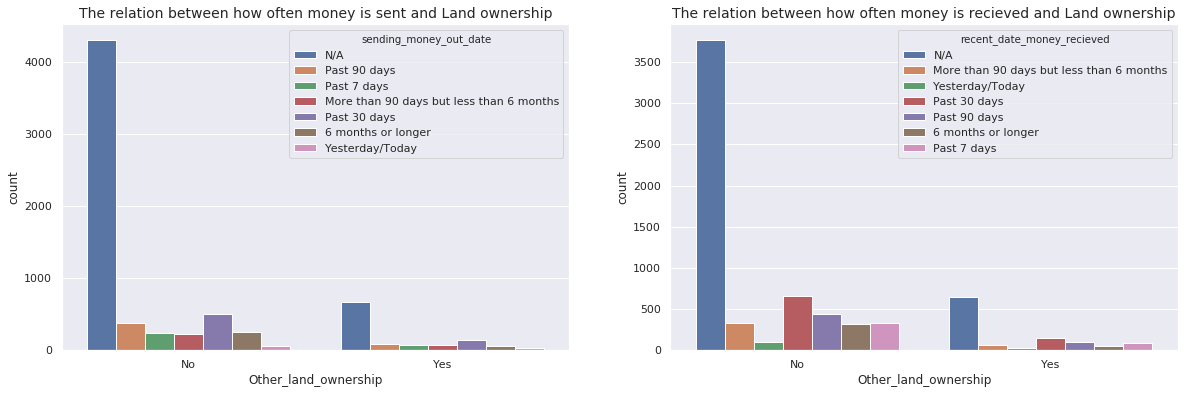

In [22]:
f, axes = plt.subplots(1, 2,figsize=(20, 6))
fontdict={'fontsize':14}
sns.set(font_scale=1)
sns.countplot(x='Other_land_ownership',hue='sending_money_out_date',data=tanz,ax=axes[0])
sns.countplot(x='Other_land_ownership',hue='recent_date_money_recieved',data=tanz,ax=axes[1])
axes[0].set_title('The relation between how often money is sent and Land ownership',fontdict=fontdict)
axes[1].set_title('The relation between how often money is recieved and Land ownership',fontdict=fontdict)
plt.show()


### How often  Mobile money services are used  and  the Type of income

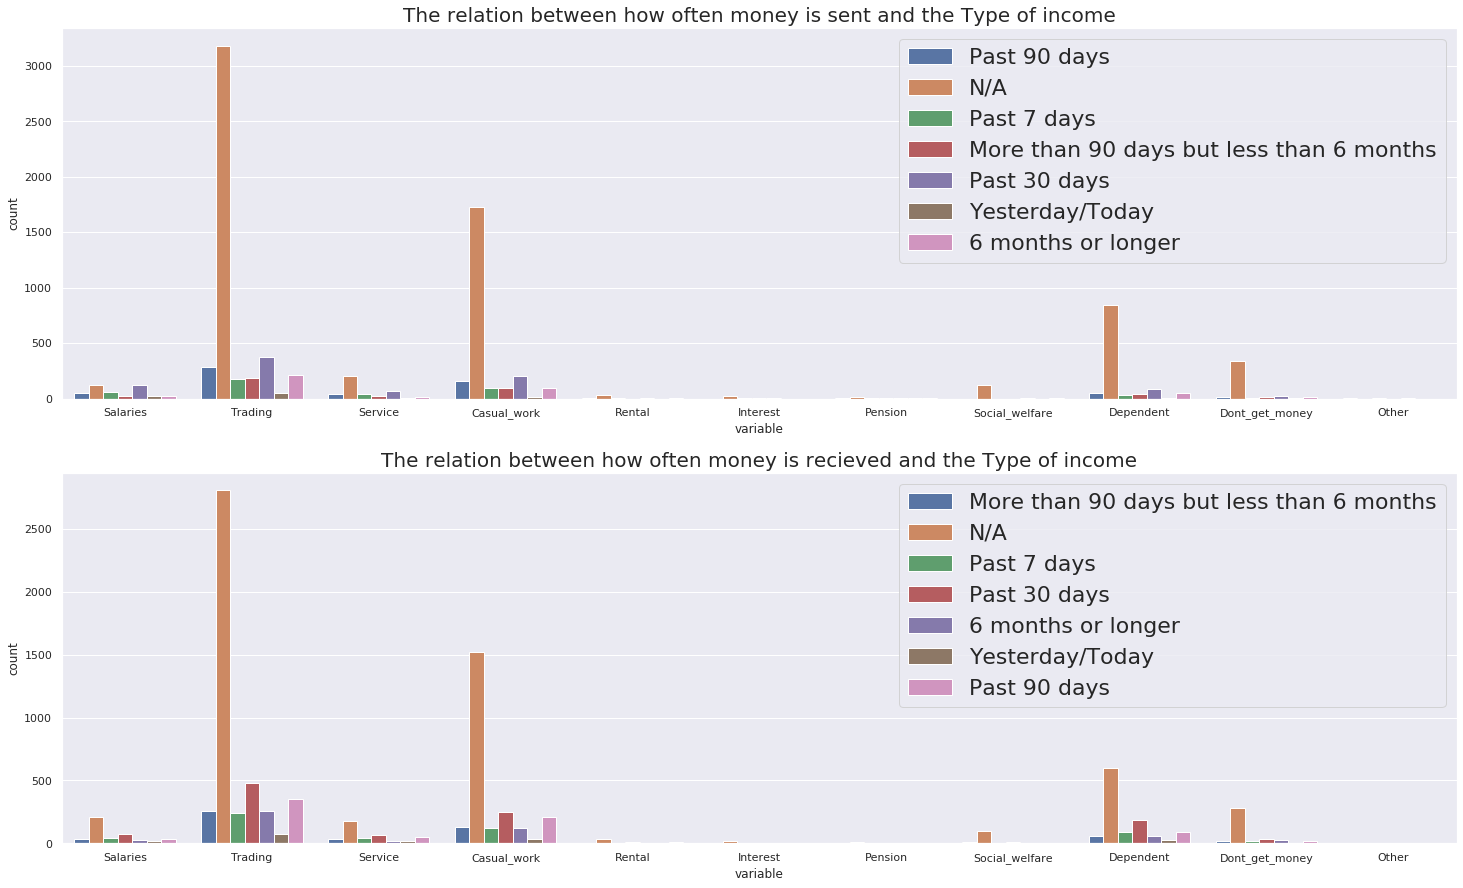

In [23]:
f, axes = plt.subplots(2, 1,figsize=(25, 15))
fontdict={'fontsize': 20}
sns.set(font_scale=2)
sns.countplot(counts.variable,hue='sending_money_out_date',data=counts,ax=axes[0])
sns.countplot(counts.variable,hue= 'recent_date_money_recieved',data =counts,ax=axes[1])
axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[0].set_title('The relation between how often money is sent and the Type of income',fontdict=fontdict)
axes[1].set_title('The relation between how often money is recieved and the Type of income',fontdict=fontdict)

plt.show()

## 6.Demographic factors associated with mobile money

In [24]:
a = {1:'Yes',2:'No'}
tanz['Owning_a_mobile_phone']=tanz.Owning_a_mobile_phone.map(a)

In [25]:
b ={-1:'N/A',1:'crops',2:'livestock product',3:'livestock',4:'aquaculture',
            5:'Agriculture products',6:'Non agriculture',7:'crafts',8:'collection',9:'processed',10:'other'}
tanz['Product_sold']=tanz.Product_sold.map(b)

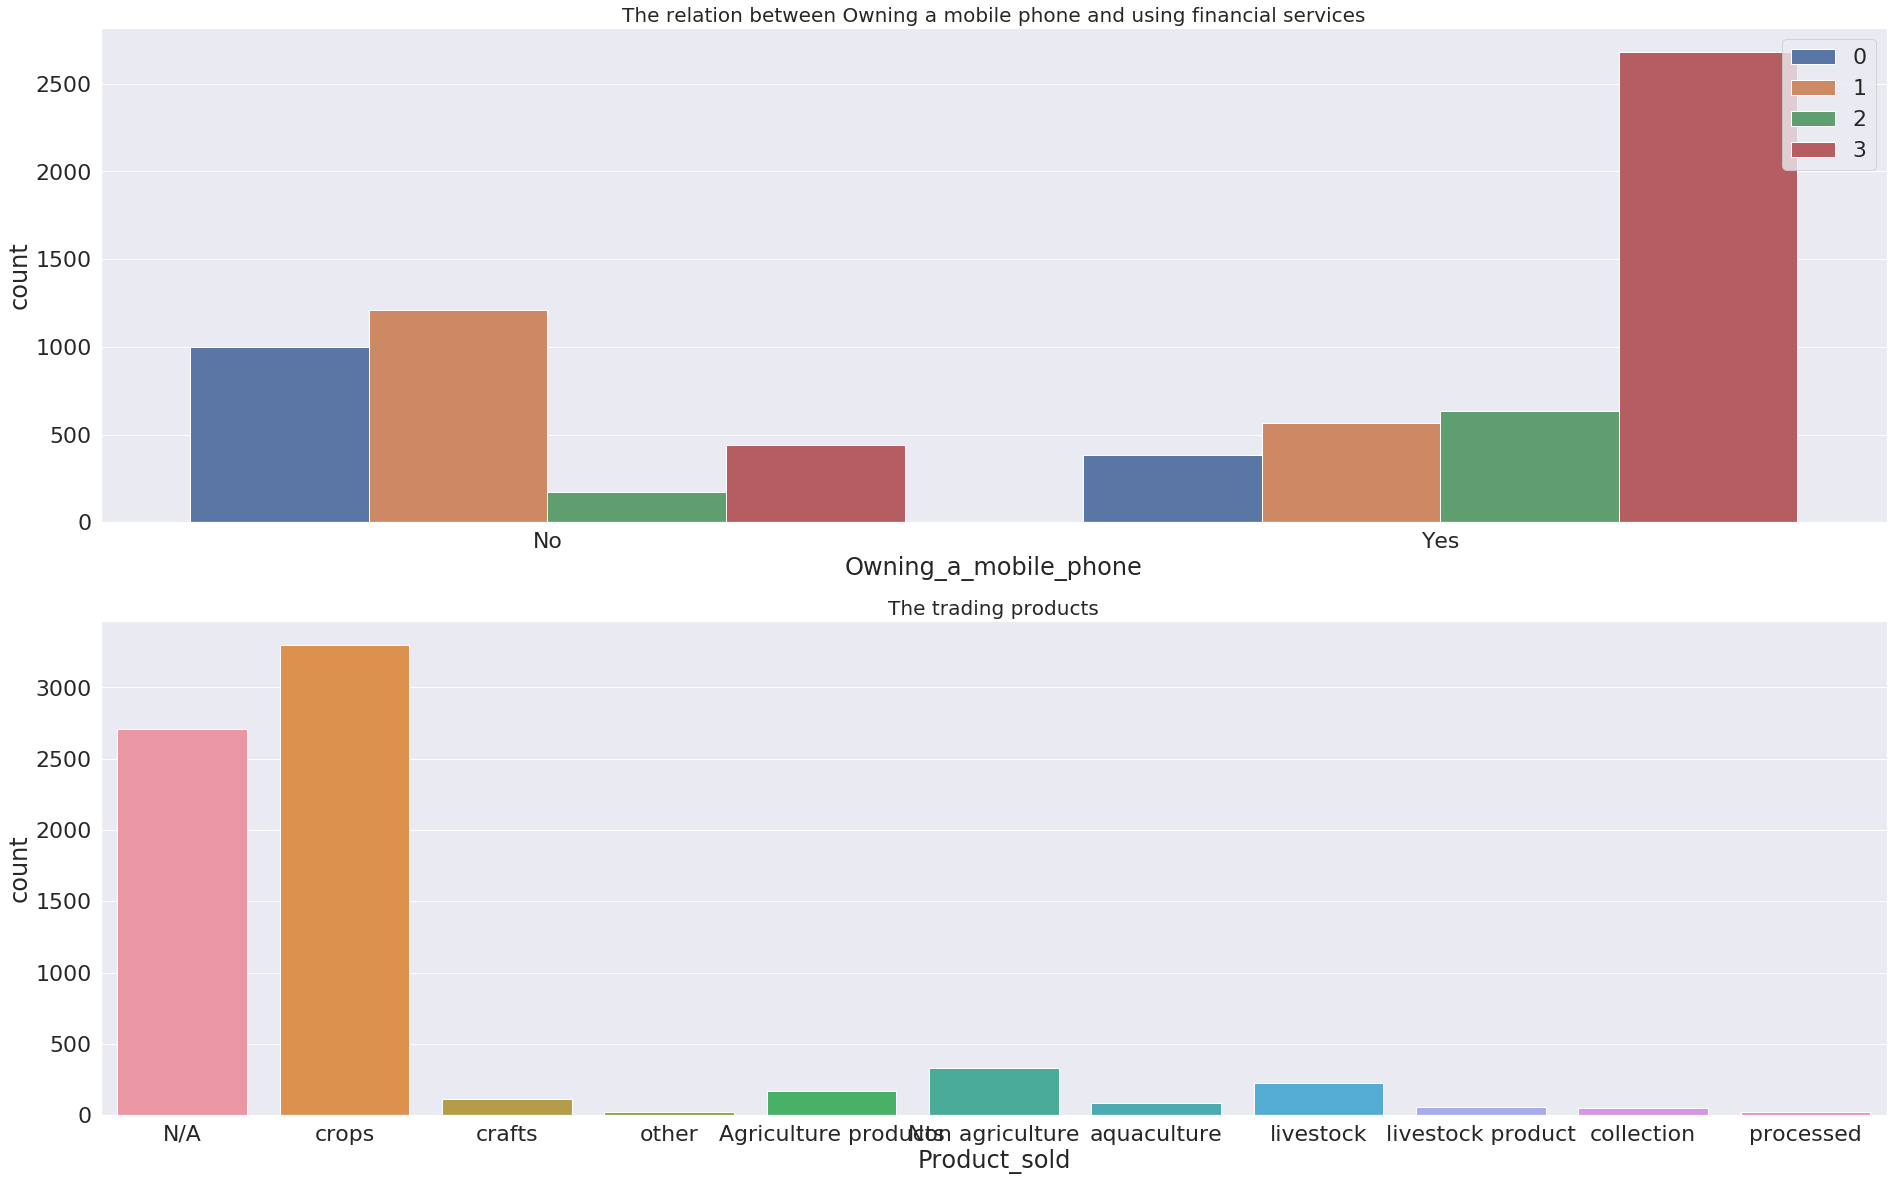

In [26]:
f, axes = plt.subplots(2, 1,figsize=(32, 20))
fontdict={'fontsize': 20}
sns.set(font_scale=2)
sns.countplot(x='Owning_a_mobile_phone',hue='mobile_money_classification',data=tanz,ax=axes[0])
sns.countplot(x='Product_sold',data=tanz,ax= axes[1])
axes[0].legend(loc='upper right')
axes[0].set_title('The relation between Owning a mobile phone and using financial services',fontdict=fontdict)
axes[1].set_title('The trading products',fontdict=fontdict)
plt.show()



In [27]:
c ={1:'no formal education',2:'some primary',3:'primary completed',
           4:'post primary',5:'some secondary',6:'higher education',7:'do not know'}
tanz['Level_of_education']=tanz.Level_of_education.map(c)

NameError: name 'training_data' is not defined

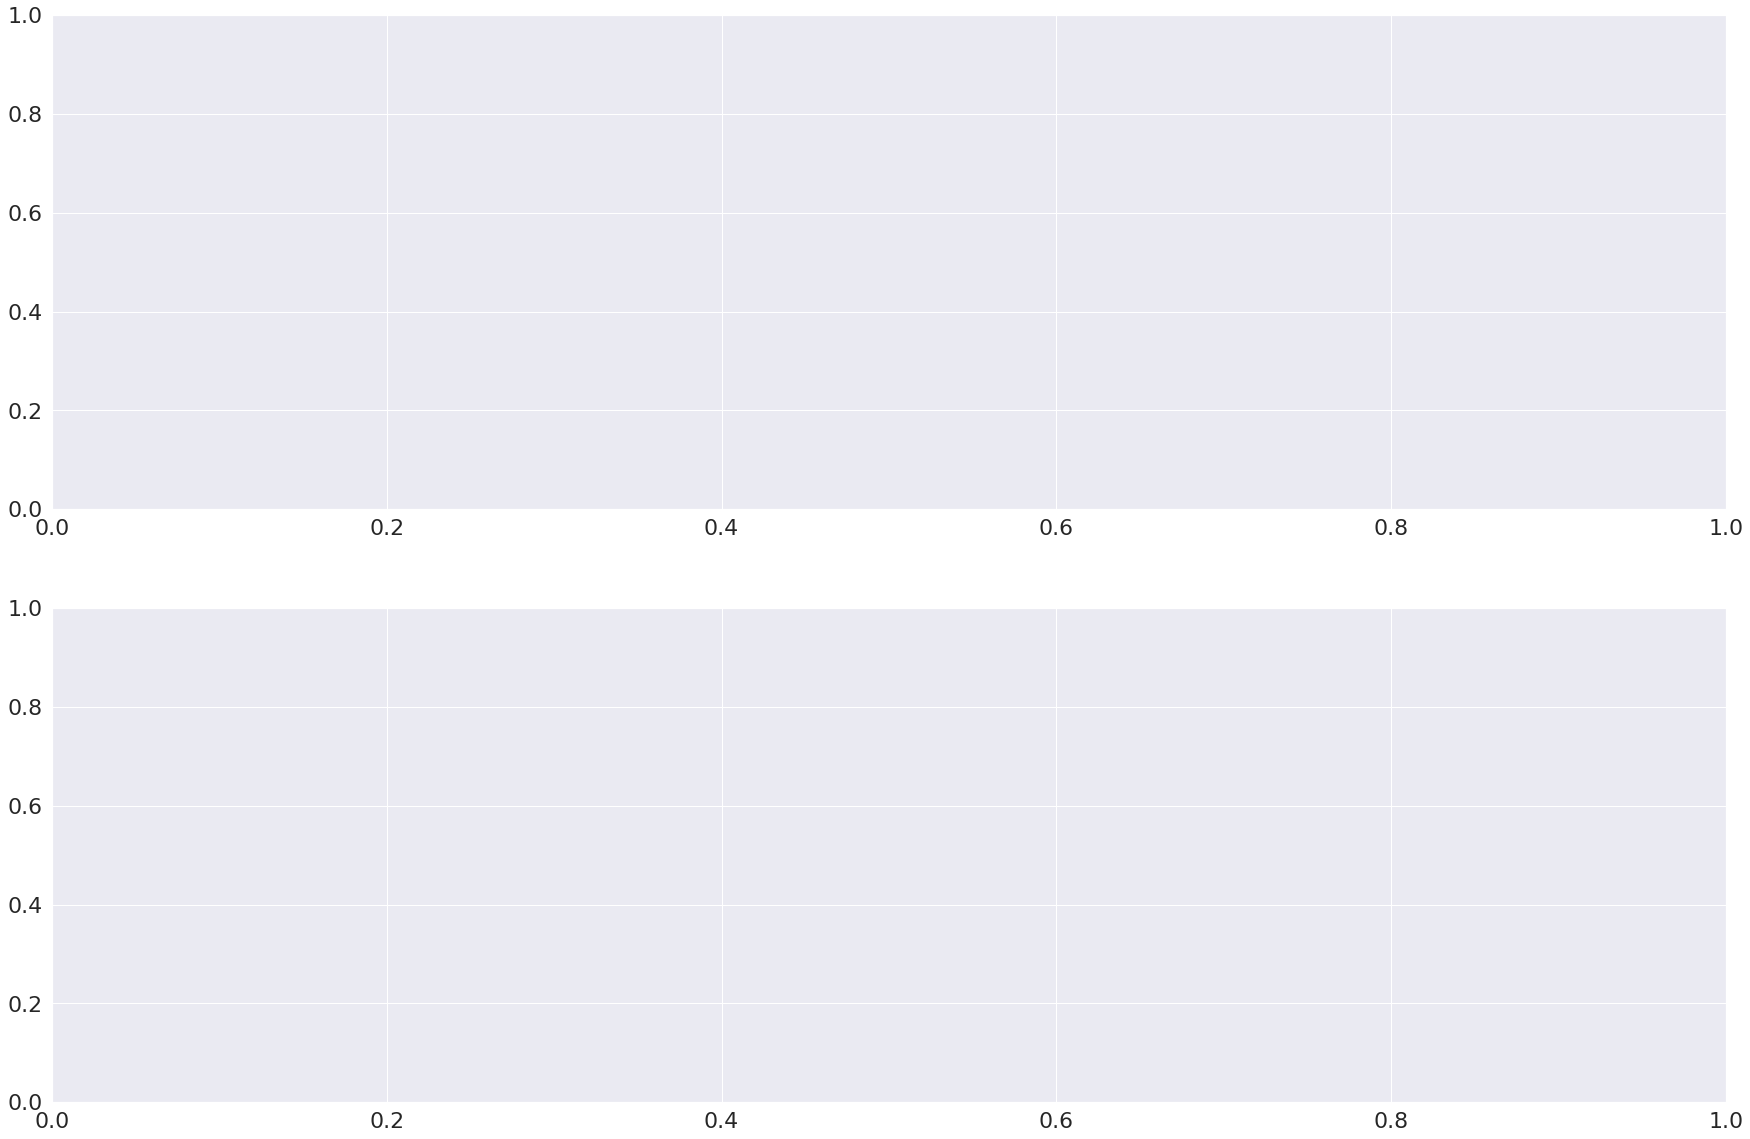

In [28]:
f, axes = plt.subplots(2, 1,figsize=(30, 20))
fontdict={'fontsize':20}
sns.set(font_scale=2)
sns.countplot(x='Level_of_education',hue='age_decade',data=training_data,ax= axes[0])
sns.countplot(counts.variable,hue='Gender',data=counts,ax = axes[1])
axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[0].set_title('The relation between Education level and Age',fontdict=fontdict)
axes[1].set_title('The relation between Types of income and Gender',fontdict=fontdict)
plt.show()